# Kadikoy/Istanbul House Price Prediction

 In this project i tried to predict of the house prices in Kadikoy/İstanbul

# Libraries

In [1]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import numpy as np
import pandas as pd
import re
import time
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from pandas import Series, DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import patsy

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Get and Parse Url

In [2]:
# def getAndParseURL(url):
#     result = requests.get(url, headers={"User-Agent":"Mozilla/5.0"})
#     soup = bts(result.text, 'html.parser')
#     return soup

# Getting Number of Total Page

In [3]:
# PAGE_NUM = []
# def find_page_num():
#     html = getAndParseURL("https://www.zingat.com/kadikoy-satilik-daire")
#     for i in range(1,41):
#         PAGE_NUM.append("https://www.zingat.com/kadikoy-satilik-daire" + "?page=" + str(i))
#     return PAGE_NUM
# find_page_num()

# Getting all links on each pages

In [4]:
# ALL_PRODUCT = []
# def all_product():
#     for i in PAGE_NUM[::]:
#         html = getAndParseURL(i)
#         for sonuc in html.findAll("a",{"class":"zl-card-inner"}):
#             ALL_PRODUCT.append("https://www.zingat.com" + sonuc.get("href"))
#     return ALL_PRODUCT
# len(all_product())

In [5]:
# RESULT = []
# for sonuc in ALL_PRODUCT[:620]:
#     html = getAndParseURL(sonuc)
#     ilan_ismi = html.find("div", {"class":"col-xs-12"}).h1.text
#     mahalle = html.find("div", {"class":"detail-location-path"}).h2.text.replace("Kadıköy\n","").replace("İstanbul","").replace(",","").strip()
#     fiyat = html.find("div", {"class":"col-md-3 price-info-text"}).find("strong",{"itemprop":"price"}).text.replace("TL","").strip()
#     net_m2 = html.find("ul", {"class":"row attribute-detail-list"}).findAll("li",{"class":"col-md-6"})[1].find("span").text.replace("m²","").strip()
#     brut_m2 = html.find("ul", {"class":"row attribute-detail-list"}).findAll("li",{"class":"col-md-6"})[2].find("span").text.replace("m²","").strip()
#     oda_salon = html.find("ul", {"class":"row attribute-detail-list"}).findAll("li",{"class":"col-md-6"})[3].find("span").text.strip()
#     oda = html.find("ul", {"class":"row attribute-detail-list"}).findAll("li",{"class":"col-md-6"})[3].find("span").text.strip()[0]
#     salon = html.find("ul", {"class":"row attribute-detail-list"}).findAll("li",{"class":"col-md-6"})[3].find("span").text.strip()[2]
#     banyo = html.find("ul", {"class":"row attribute-detail-list"}).findAll("li",{"class":"col-md-6"})[4].find("span").text.strip()
#     fotograf = html.find("div", {"class":"detail-images-slide-container hidden-xs hidden-sm"}).a.span.text.replace("+","")

#     RESULT.append([ilan_ismi, mahalle, fiyat, net_m2, brut_m2, oda_salon, oda, salon, banyo, fotograf])

In [6]:
# columns = ["İLAN ADI", "MAHALLE", "FİYAT", "NET(m²)", "BRÜT(m²)", "ODA-SALON SAYISI", "ODA SAYISI", "SALON SAYISI", "BANYO SAYISI", "FOTOĞRAF SAYISI"]
# df = pd.DataFrame.from_records(RESULT, columns=columns)

In [7]:
# df.to_csv(r"ilanlar.csv", encoding="utf-8", index=False)

In [8]:
# df.head(10)

# Data Preprocessing

In [9]:
df = pd.read_csv('ilanlar.csv',sep=";")
df.head()

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA-SALON SAYISI,ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI
0,GÖZTEPE SERVER İSKİT SOKAK'TA 3+1 SATILIK DAİRE,Göztepe,4.300.000,92,110,3+1,3,1,2,16.0
1,DİNAMİK'TEN YALI PARSELİN'DE MUHTEŞEM 4+1 BALK...,Fenerbahçe,6.300.000,150,180,4+1,4,1,2,29.0
2,DİNAMİK'TEN KALAMIŞ MARİNAYA YAKIN 165M2 3+1 E...,Fenerbahçe,4.500.000,125,165,3+1,3,1,2,31.0
3,DİNAMİK'TEN ÇİFTEHAVUZLAR SAHİLDE KAPANMAZ PAR...,Caddebostan,8.500.000,125,165,3+1,3,1,2,23.0
4,DİNAMİK'TEN GÖZTEPE TÜTÜNCÜ'DE MARMARAYA 1 DK ...,Göztepe,3.250.000,100,135,3+1,3,1,1,25.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   İLAN ADI          620 non-null    object 
 1   MAHALLE           620 non-null    object 
 2   FİYAT             620 non-null    object 
 3   NET(m²)           620 non-null    int64  
 4   BRÜT(m²)          620 non-null    int64  
 5   ODA-SALON SAYISI  620 non-null    object 
 6   ODA SAYISI        620 non-null    int64  
 7   SALON SAYISI      620 non-null    object 
 8   BANYO SAYISI      620 non-null    object 
 9   FOTOĞRAF SAYISI   596 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 48.6+ KB


In [11]:
df.sort_values("ODA SAYISI")

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA-SALON SAYISI,ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI
242,ALFA'DAN KADIKÖY TORKAM 'DA 96 m BÜYÜK 1+1 DAİRE,Dumlupınar,1.000.000,68,96,0 TL (aylık),0,,0 TL (aylık),14.0
241,ALFA'DAN TEKNİK YAPI UP-LİFE 'DA 2+1 DAİRE SAT...,Dumlupınar,850.000,55,87,0 TL (aylık),0,,0 TL (aylık),14.0
234,ALFA'DAN KADIKÖY 1071 'DE 24. KATTA ACİL 4+1 D...,Fikirtepe,3.200.000,164,250,0 TL (aylık),0,,0 TL (aylık),25.0
259,ALFA'DAN EĞİTİM MAHALLESİNDE ACİL SATILIK 3+1 ...,Eğitim,700.000,115,125,0 TL (aylık),0,,0 TL (aylık),8.0
236,ALFA'DAN HALDIZ OBAKÖY PROJESİNDE 16 . KATTA 2...,Dumlupınar,750.000,56,83,0 TL (aylık),0,,0 TL (aylık),17.0
...,...,...,...,...,...,...,...,...,...,...
251,A+ SATILIK MUHTEŞEM DAİRE RAGIP PAŞA KORUSU Sİ...,Caddebostan,33.000.000,310,416,7+2,7,2,4,36.0
261,ALFA'DAN KADIKÖY -1071 'DE 250 m 4+1 REZİDANS ...,Fikirtepe,3.200.000,165,250,700 TL (aylık),7,0,0 TL (aylık),7.0
470,CADDEBOSTAN GENÇ BİNADA 495M2 DENİZ MANZARALI ...,Caddebostan,14.850.000,420,495,8+2,8,2,4,29.0
580,CİTY DEN CADDEBOSTAN DA TEK TAPUDA İKİ SÜPER D...,Caddebostan,13.800.000,355,490,8+2,8,2,5,36.0


In [12]:
df["BANYO SAYISI"] = df["BANYO SAYISI"].apply(lambda x : str(x).replace("0  TL  (aylık)",""))
df["ODA-SALON SAYISI"] = df["ODA-SALON SAYISI"].apply(lambda x : str(x).replace("0  TL  (aylık)",""))
df["ODA SAYISI"] = df["ODA SAYISI"].apply(lambda x : str(x).replace("0",""))
df["SALON SAYISI"] = df["SALON SAYISI"].apply(lambda x: str(x).replace(" ", ""))
df["BANYO SAYISI"] = df["BANYO SAYISI"].apply(lambda x: str(x).replace(" ", ""))

In [13]:
df["NET(m²)"] = pd.to_numeric(df["NET(m²)"], downcast="float")
df["BRÜT(m²)"] = pd.to_numeric(df["BRÜT(m²)"])
df["FOTOĞRAF SAYISI"] = pd.to_numeric(df["FOTOĞRAF SAYISI"], downcast="float")
df["ODA SAYISI"] = pd.to_numeric(df["ODA SAYISI"])
df["SALON SAYISI"] = pd.to_numeric(df["SALON SAYISI"])
df["BANYO SAYISI"] = pd.to_numeric(df["BANYO SAYISI"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   İLAN ADI          620 non-null    object 
 1   MAHALLE           620 non-null    object 
 2   FİYAT             620 non-null    object 
 3   NET(m²)           620 non-null    float32
 4   BRÜT(m²)          620 non-null    int64  
 5   ODA-SALON SAYISI  620 non-null    object 
 6   ODA SAYISI        615 non-null    float64
 7   SALON SAYISI      615 non-null    float64
 8   BANYO SAYISI      612 non-null    float64
 9   FOTOĞRAF SAYISI   596 non-null    float32
dtypes: float32(2), float64(3), int64(1), object(4)
memory usage: 43.7+ KB


In [15]:
df.isnull().sum()

İLAN ADI             0
MAHALLE              0
FİYAT                0
NET(m²)              0
BRÜT(m²)             0
ODA-SALON SAYISI     0
ODA SAYISI           5
SALON SAYISI         5
BANYO SAYISI         8
FOTOĞRAF SAYISI     24
dtype: int64

In [16]:
photo_median = df["FOTOĞRAF SAYISI"].median()
photo_median

24.0

In [17]:
df["FOTOĞRAF SAYISI"].fillna(photo_median,inplace=True)

In [18]:
salon_median = df["SALON SAYISI"].median()
salon_median

1.0

In [19]:
df["SALON SAYISI"].fillna(salon_median, inplace=True)

In [20]:
oda_median = df["ODA SAYISI"].median()
oda_median

3.0

In [21]:
df["ODA SAYISI"].fillna(salon_median, inplace=True)

In [22]:
banyo_median = df["BANYO SAYISI"].median()
banyo_median

2.0

In [23]:
df["BANYO SAYISI"].fillna(salon_median, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   İLAN ADI          620 non-null    object 
 1   MAHALLE           620 non-null    object 
 2   FİYAT             620 non-null    object 
 3   NET(m²)           620 non-null    float32
 4   BRÜT(m²)          620 non-null    int64  
 5   ODA-SALON SAYISI  620 non-null    object 
 6   ODA SAYISI        620 non-null    float64
 7   SALON SAYISI      620 non-null    float64
 8   BANYO SAYISI      620 non-null    float64
 9   FOTOĞRAF SAYISI   620 non-null    float32
dtypes: float32(2), float64(3), int64(1), object(4)
memory usage: 43.7+ KB


In [25]:
df["FİYAT"] = df["FİYAT"].apply(lambda x : str(x).replace(".","")).astype(int)
df["NET(m²)"] = df["NET(m²)"].astype(int)
df["ODA SAYISI"] = df["ODA SAYISI"].astype(int)
df["SALON SAYISI"] = df["SALON SAYISI"].astype(int)
df["BANYO SAYISI"] = df["BANYO SAYISI"].astype(int)
df["FOTOĞRAF SAYISI"] = df["FOTOĞRAF SAYISI"].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   İLAN ADI          620 non-null    object
 1   MAHALLE           620 non-null    object
 2   FİYAT             620 non-null    int32 
 3   NET(m²)           620 non-null    int32 
 4   BRÜT(m²)          620 non-null    int64 
 5   ODA-SALON SAYISI  620 non-null    object
 6   ODA SAYISI        620 non-null    int32 
 7   SALON SAYISI      620 non-null    int32 
 8   BANYO SAYISI      620 non-null    int32 
 9   FOTOĞRAF SAYISI   620 non-null    int32 
dtypes: int32(6), int64(1), object(3)
memory usage: 34.0+ KB


In [27]:
le = LabelEncoder()

df["MAHALLE"] = le.fit_transform(df["MAHALLE"])

In [28]:
df.head(10)

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA-SALON SAYISI,ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI
0,GÖZTEPE SERVER İSKİT SOKAK'TA 3+1 SATILIK DAİRE,13,4300000,92,110,3+1,3,1,2,16
1,DİNAMİK'TEN YALI PARSELİN'DE MUHTEŞEM 4+1 BALK...,10,6300000,150,180,4+1,4,1,2,29
2,DİNAMİK'TEN KALAMIŞ MARİNAYA YAKIN 165M2 3+1 E...,10,4500000,125,165,3+1,3,1,2,31
3,DİNAMİK'TEN ÇİFTEHAVUZLAR SAHİLDE KAPANMAZ PAR...,5,8500000,125,165,3+1,3,1,2,23
4,DİNAMİK'TEN GÖZTEPE TÜTÜNCÜ'DE MARMARAYA 1 DK ...,13,3250000,100,135,3+1,3,1,1,25
5,FENERYOLU BAĞDAT'A 1.PARALEL 3 YILLIK İSKANLI ...,11,3300000,70,90,2+1,2,1,1,31
6,KOZYATAĞI KAYA SULTAN SOKAK 350m2 DEPREM SONRA...,15,3350000,300,350,5+2,5,2,3,31
7,KAZASKER PAŞA KORUSU 14.KAT DENİZ MANZARALI 18...,2,5000000,140,180,3+1,3,1,2,31
8,DİNAMİK'TEN CADDEBOSTAN SAHİL'DE 3+1 BALKONLU ...,5,6945000,105,135,3+1,3,1,2,23
9,Dinamik'ten Feneryolun'da Site İçinde Önü Açık...,11,4150000,105,140,3+1,3,1,2,33


In [29]:
num_cols = df.drop(columns=['İLAN ADI', 'ODA-SALON SAYISI', 'FOTOĞRAF SAYISI'], axis=1).columns
num_cols

Index(['MAHALLE', 'FİYAT', 'NET(m²)', 'BRÜT(m²)', 'ODA SAYISI', 'SALON SAYISI',
       'BANYO SAYISI'],
      dtype='object')

# Remove Outliers

In [30]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls

In [31]:
index_list = []
for feature in df.drop(columns=['İLAN ADI', 'ODA-SALON SAYISI',"SALON SAYISI","ODA SAYISI","BANYO SAYISI",'FOTOĞRAF SAYISI'], axis=1).columns:
    index_list.extend(outliers(df, feature))

In [32]:
index_list

[14,
 36,
 41,
 77,
 118,
 119,
 165,
 168,
 170,
 174,
 192,
 204,
 214,
 217,
 222,
 226,
 247,
 250,
 251,
 253,
 266,
 272,
 273,
 285,
 288,
 290,
 297,
 313,
 326,
 331,
 334,
 338,
 352,
 359,
 370,
 375,
 378,
 405,
 412,
 421,
 436,
 448,
 468,
 470,
 473,
 475,
 484,
 515,
 538,
 550,
 577,
 580,
 617,
 6,
 14,
 18,
 41,
 73,
 82,
 119,
 124,
 135,
 165,
 167,
 168,
 171,
 174,
 192,
 201,
 217,
 226,
 250,
 251,
 264,
 283,
 284,
 287,
 290,
 297,
 313,
 326,
 338,
 352,
 358,
 365,
 370,
 375,
 384,
 405,
 409,
 421,
 452,
 457,
 462,
 468,
 470,
 471,
 473,
 475,
 511,
 514,
 515,
 549,
 550,
 570,
 577,
 580,
 608,
 617,
 6,
 14,
 18,
 41,
 73,
 82,
 119,
 165,
 168,
 171,
 174,
 217,
 226,
 250,
 251,
 264,
 283,
 284,
 290,
 313,
 326,
 338,
 352,
 365,
 370,
 375,
 384,
 405,
 416,
 421,
 448,
 468,
 470,
 473,
 475,
 511,
 515,
 549,
 550,
 570,
 580,
 617]

In [33]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [34]:
df.shape

(620, 10)

In [35]:
df_temiz = remove(df, index_list)

In [36]:
df_temiz.shape

(540, 10)

In [37]:
df_temiz = df_temiz.reset_index()

In [38]:
df_temiz = df_temiz.drop(columns=['İLAN ADI', 'ODA-SALON SAYISI', 'FOTOĞRAF SAYISI','index'], axis=1)

# Data Visualization

In [39]:
df_temiz["MAHALLE"].unique()

array([13, 10,  5, 11,  2,  8, 20,  6, 15,  7,  3,  4,  1, 12, 21, 16, 18,
       19, 14,  9, 17,  0])

In [40]:
DF = df_temiz.copy()

In [41]:
new_df = pd.get_dummies(df_temiz, columns=["MAHALLE"])
# new_df.drop(columns="ODA-SALON SAYISI", inplace=True)
# new_df.drop(columns="İLAN ADI", inplace=True)
new_df

,FİYAT,NET(m²),BRÜT(m²),ODA SAYISI,SALON SAYISI,BANYO SAYISI,MAHALLE_0,MAHALLE_1,MAHALLE_2,MAHALLE_3,...,MAHALLE_12,MAHALLE_13,MAHALLE_14,MAHALLE_15,MAHALLE_16,MAHALLE_17,MAHALLE_18,MAHALLE_19,MAHALLE_20,MAHALLE_21
0,4300000,92,110,3,1,2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,6300000,150,180,4,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4500000,125,165,3,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8500000,125,165,3,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3250000,100,135,3,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,3100000,120,150,3,1,2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
536,2750000,84,109,3,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537,6950000,180,225,4,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
538,4100000,96,135,3,1,2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [42]:
new_df.sort_values("FİYAT")

,FİYAT,NET(m²),BRÜT(m²),ODA SAYISI,SALON SAYISI,BANYO SAYISI,MAHALLE_0,MAHALLE_1,MAHALLE_2,MAHALLE_3,...,MAHALLE_12,MAHALLE_13,MAHALLE_14,MAHALLE_15,MAHALLE_16,MAHALLE_17,MAHALLE_18,MAHALLE_19,MAHALLE_20,MAHALLE_21
230,700000,115,125,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211,750000,56,83,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,825000,90,100,2,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
319,850000,36,58,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
216,850000,55,87,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,10000000,120,155,3,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
333,10000000,112,157,3,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
381,10500000,140,196,4,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
511,10500000,146,200,4,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


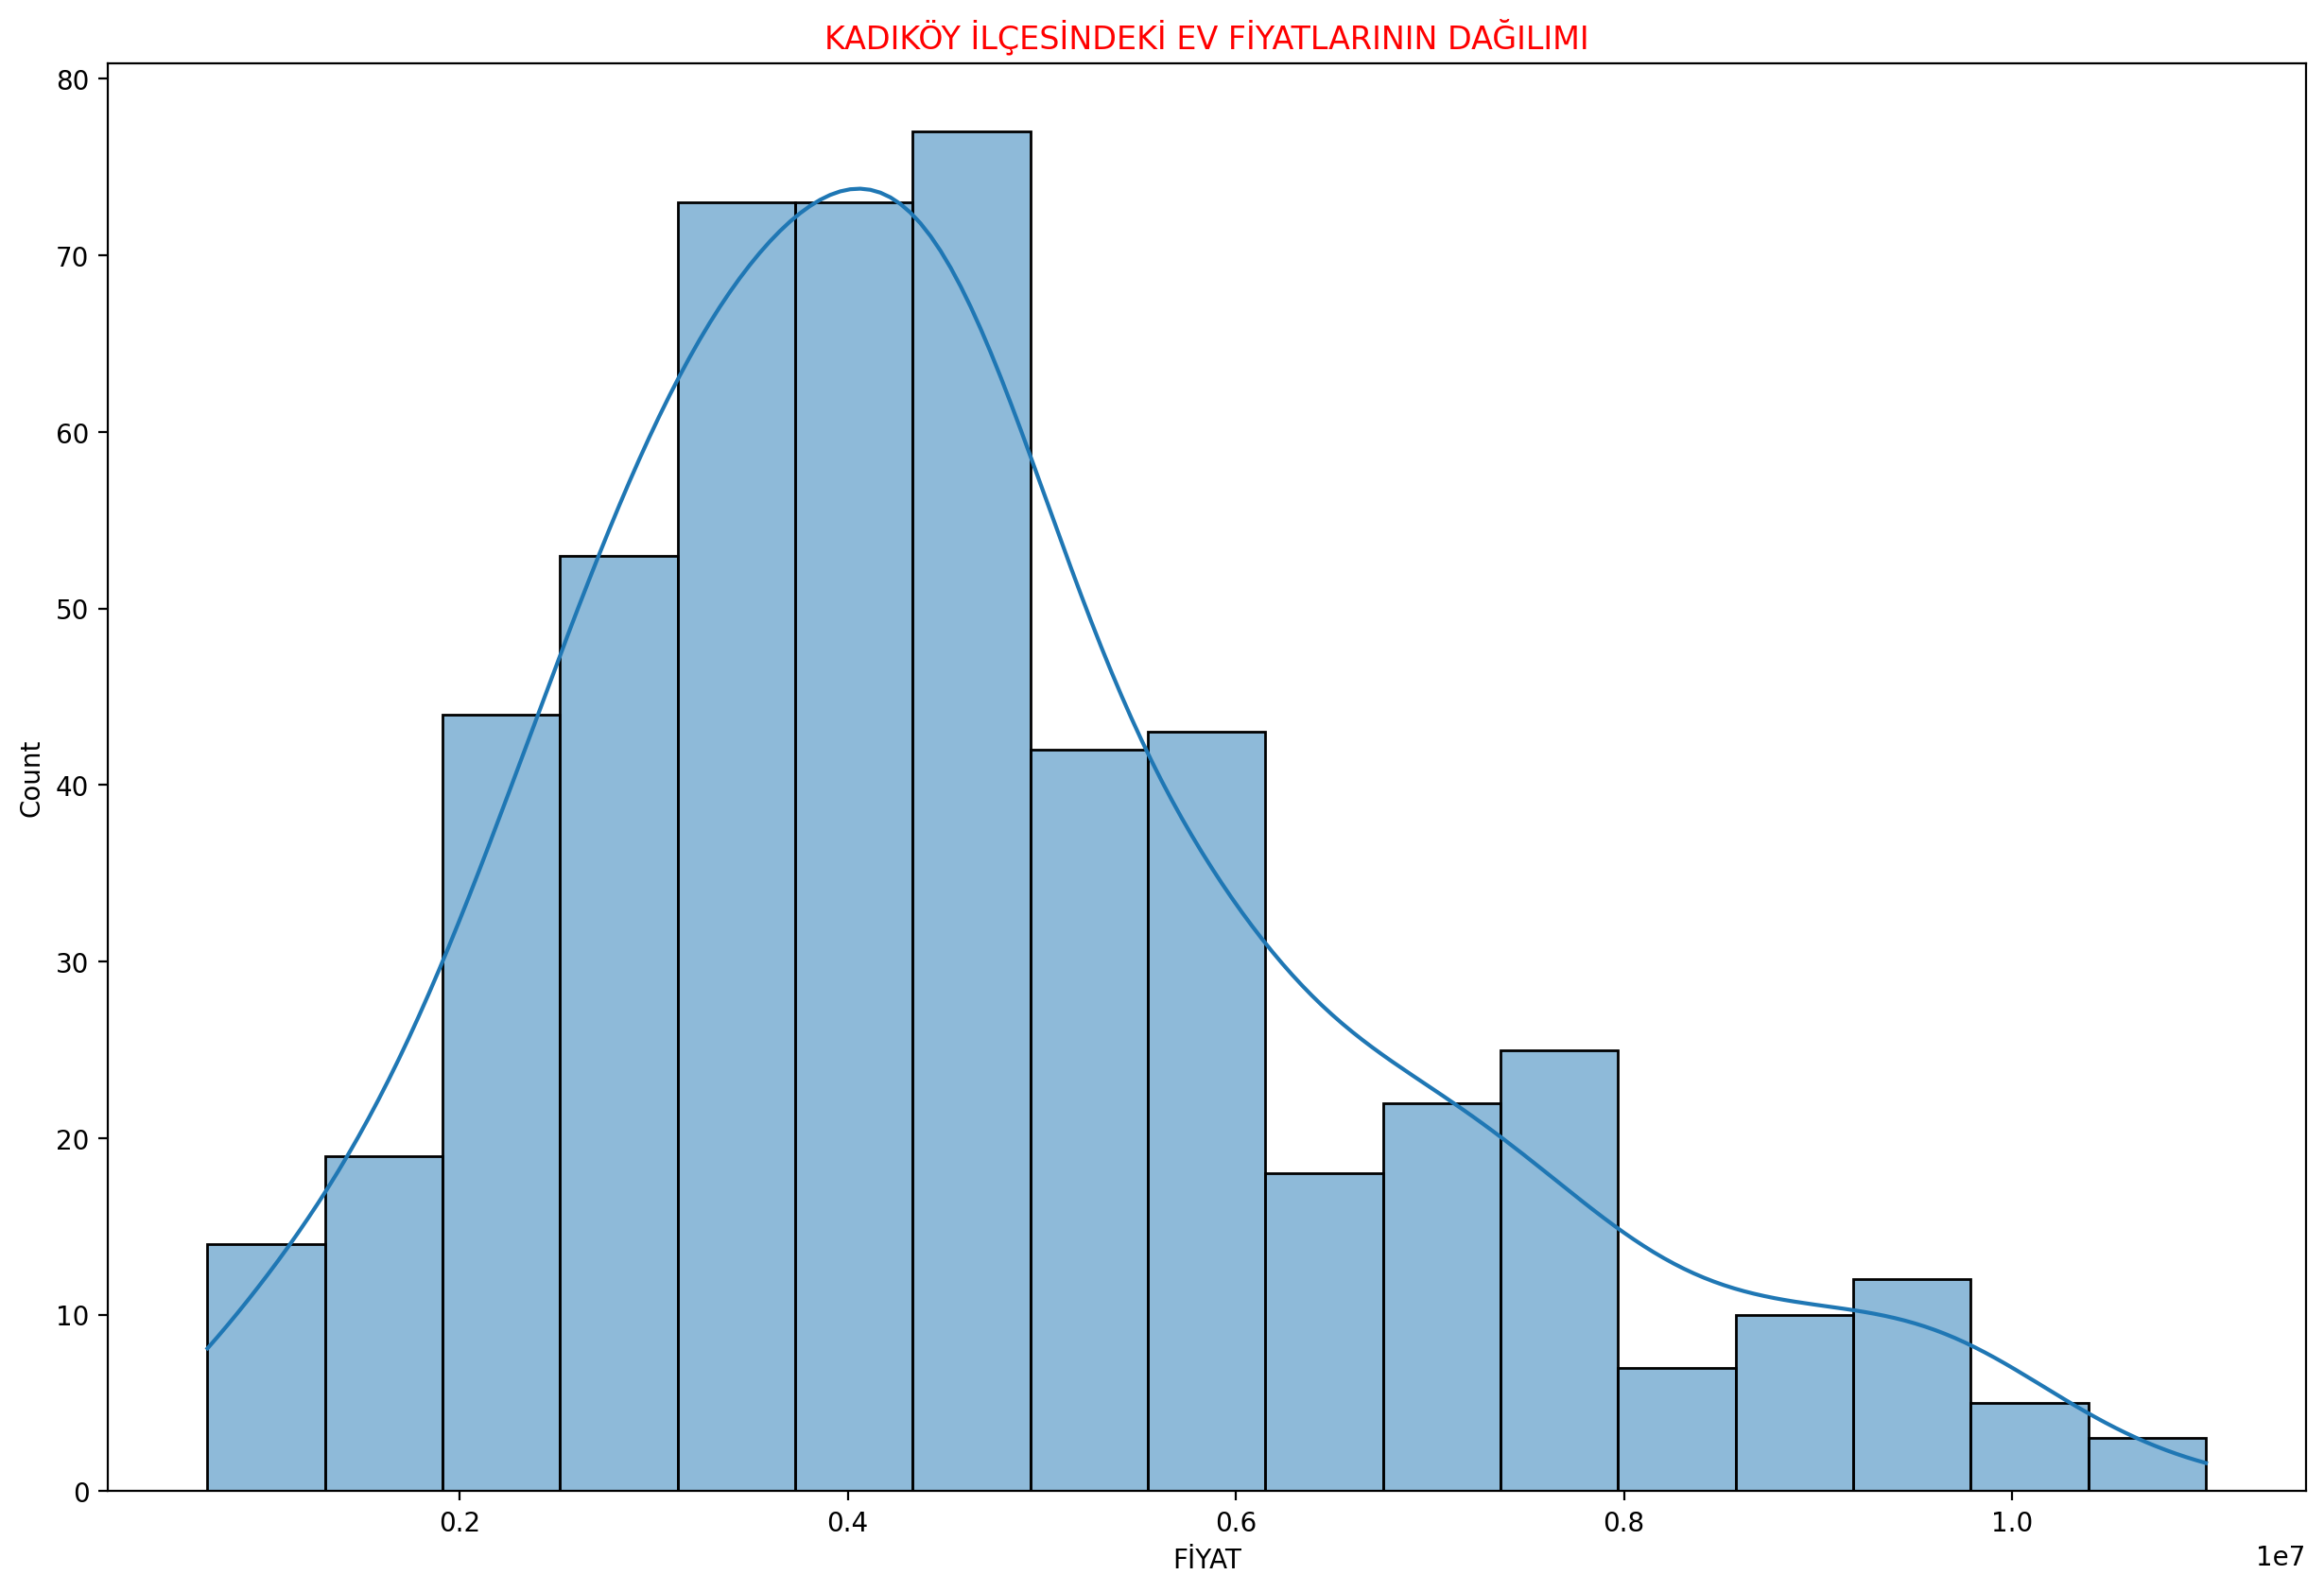

In [43]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("KADIKÖY İLÇESİNDEKİ EV FİYATLARININ DAĞILIMI", c="red")
sns.histplot(data=new_df, x="FİYAT", kde=True)
plt.savefig("C:/Users/cemre/Desktop/projeler/house prices predict/HousePriceDistributionKadikoy.png", dpi=200)

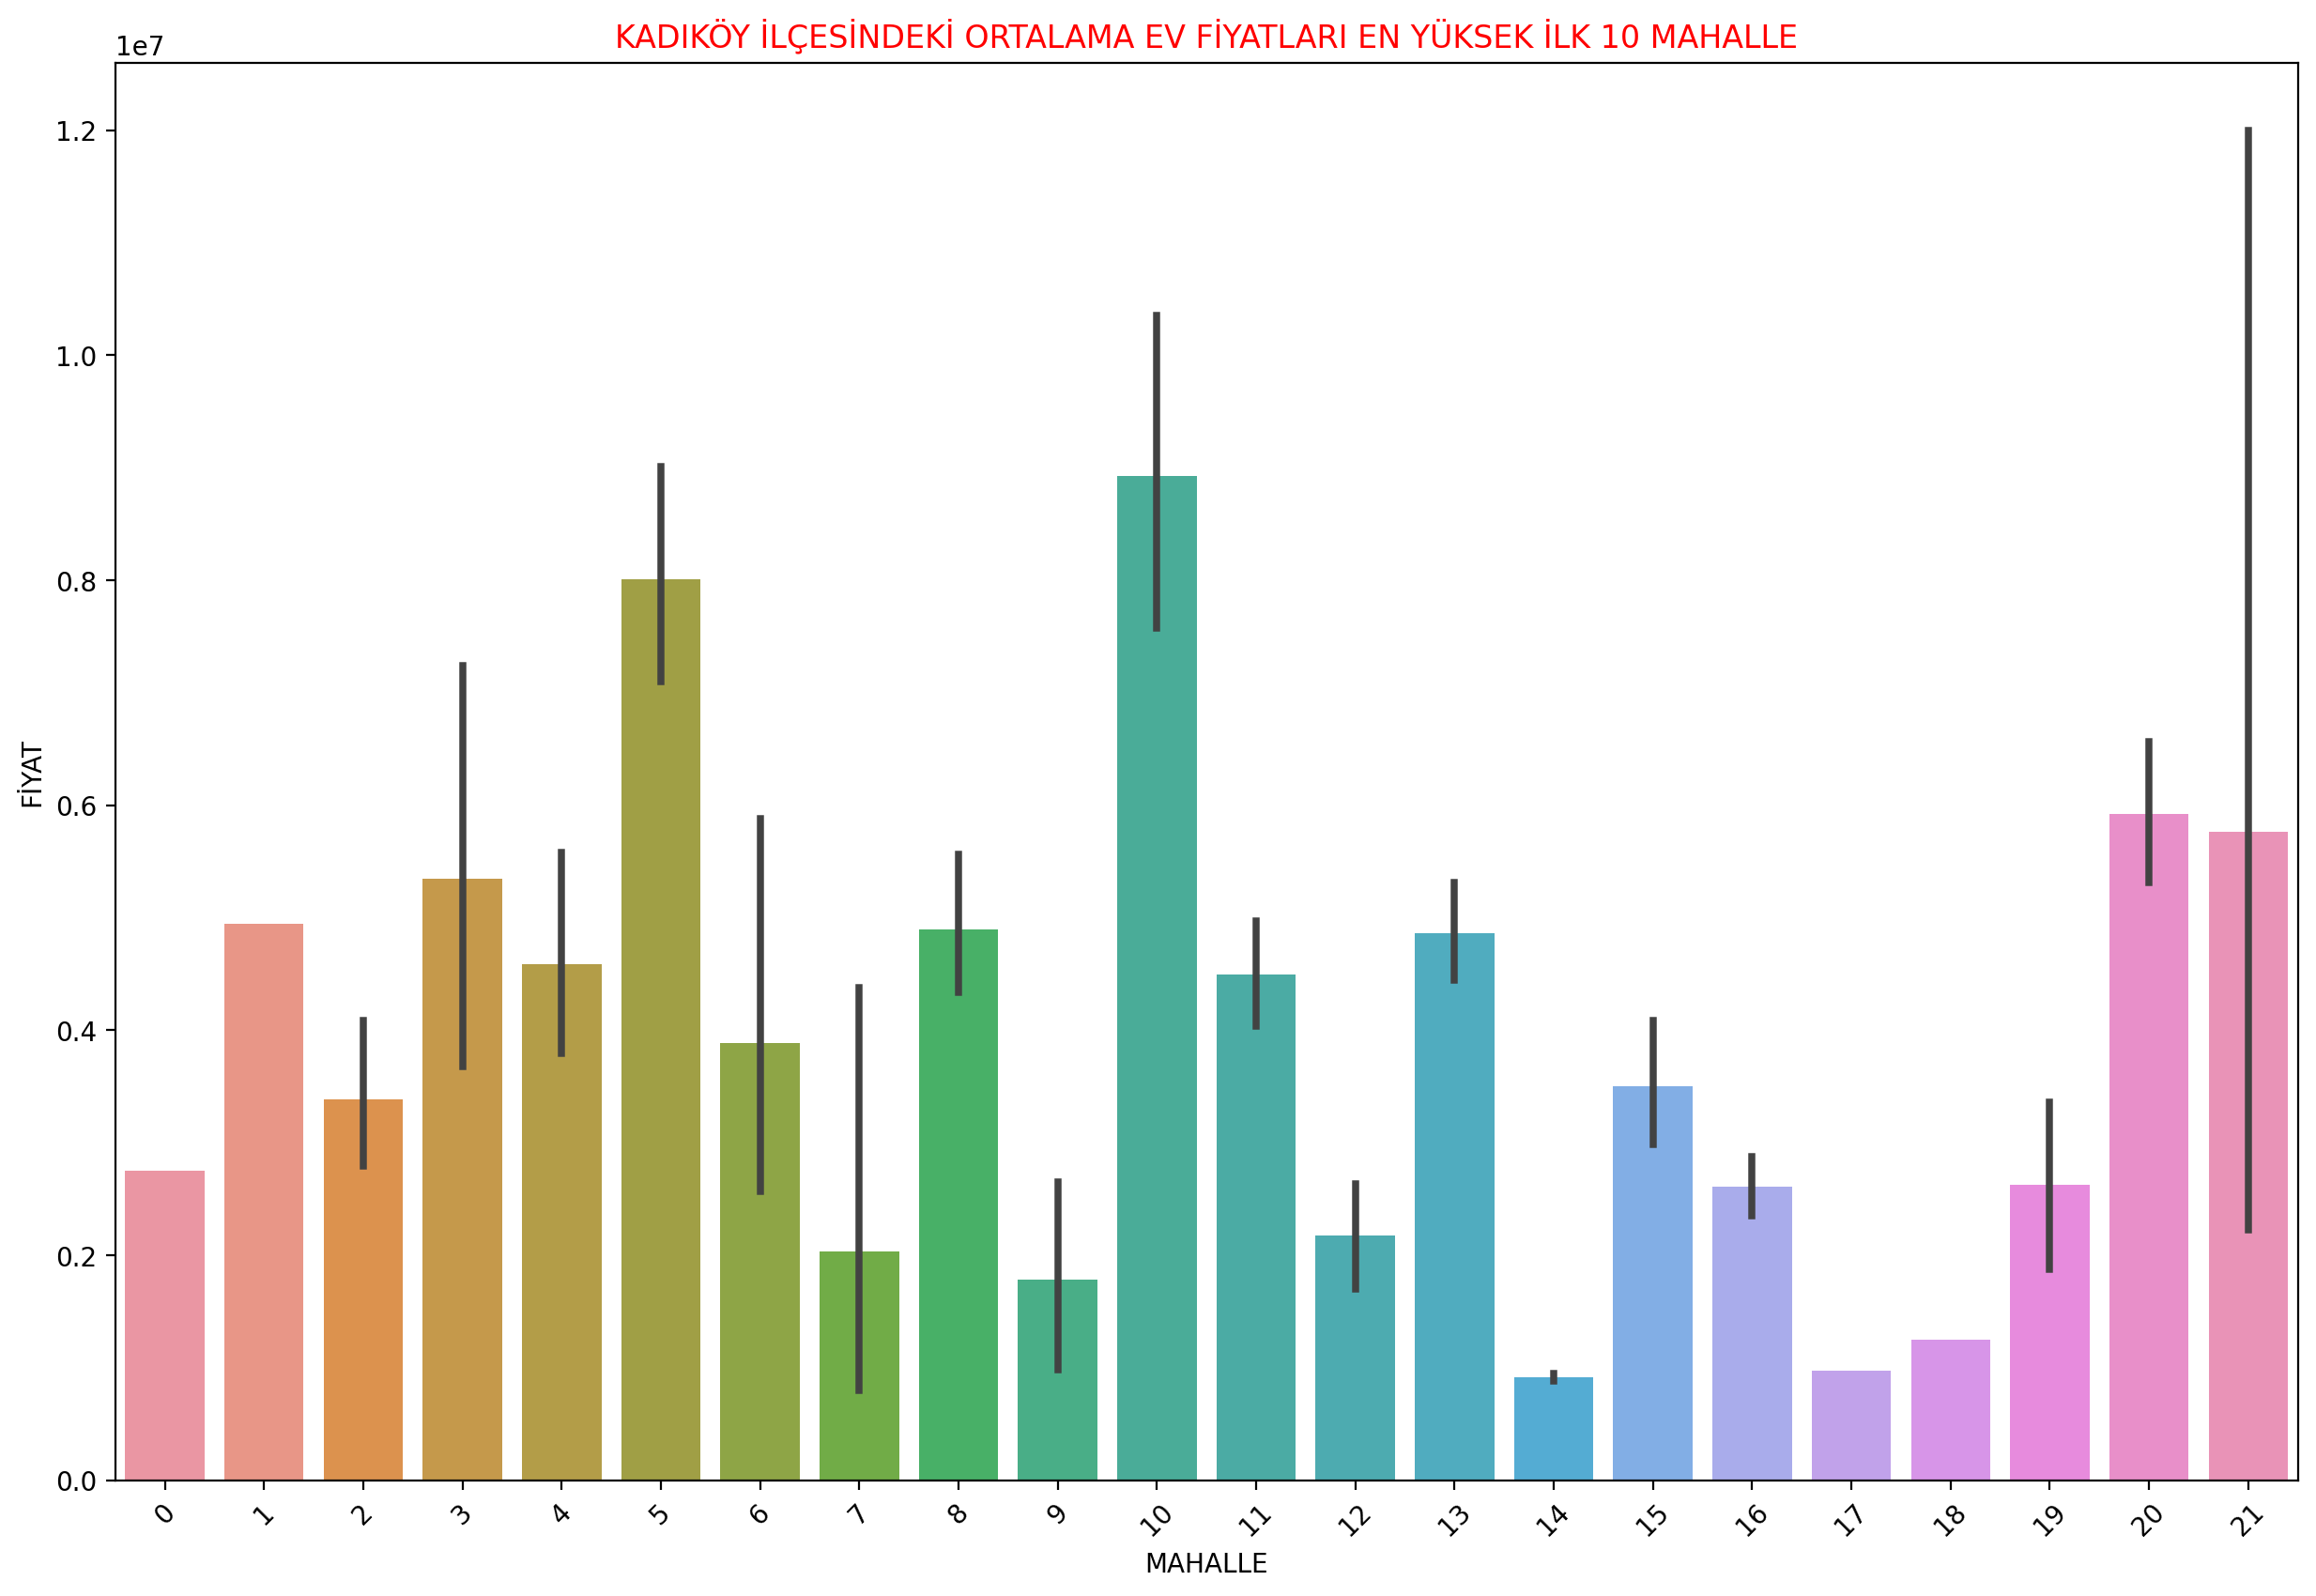

In [44]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("KADIKÖY İLÇESİNDEKİ ORTALAMA EV FİYATLARI EN YÜKSEK İLK 10 MAHALLE", c="red")
sns.barplot(x="MAHALLE", y="FİYAT", data=df)
plt.xticks(rotation=45)
plt.savefig("C:/Users/cemre/Desktop/projeler/house prices predict/01_HousePriceDistributionKadikoy.png", dpi=200)

In [45]:
new_df.corr()

,FİYAT,NET(m²),BRÜT(m²),ODA SAYISI,SALON SAYISI,BANYO SAYISI,MAHALLE_0,MAHALLE_1,MAHALLE_2,MAHALLE_3,...,MAHALLE_12,MAHALLE_13,MAHALLE_14,MAHALLE_15,MAHALLE_16,MAHALLE_17,MAHALLE_18,MAHALLE_19,MAHALLE_20,MAHALLE_21
FİYAT,1.000000,0.528983,0.548378,0.512186,0.271276,0.487284,-0.038866,0.007922,-0.104588,-0.019888,...,-0.154541,-0.007728,-0.110257,-0.097902,-0.222887,-0.076615,-0.070767,-0.117916,0.045222,-0.088854
NET(m²),0.528983,1.000000,0.963460,0.763775,0.445468,0.566967,-0.043988,0.031092,-0.054768,0.052770,...,-0.096579,0.028568,-0.069235,0.035287,-0.149795,-0.024295,-0.067373,-0.053399,0.039431,-0.068340
BRÜT(m²),0.548378,0.963460,1.000000,0.775582,0.439333,0.583016,-0.044775,0.029274,-0.042225,-0.001713,...,-0.047784,0.030190,-0.087073,0.031940,-0.137230,-0.043761,-0.079264,-0.061774,0.031258,-0.065433
ODA SAYISI,0.512186,0.763775,0.775582,1.000000,0.254246,0.546633,-0.004159,-0.004159,-0.016319,0.021126,...,-0.051244,0.036760,-0.046639,0.037235,-0.135734,-0.061738,-0.061738,-0.052821,0.014436,-0.061026
SALON SAYISI,0.271276,0.445468,0.439333,0.254246,1.000000,0.393050,-0.008830,-0.008830,-0.034651,-0.029561,...,-0.141067,-0.072478,-0.012499,0.043505,-0.080622,-0.008830,-0.008830,-0.025138,0.137592,-0.019818
BANYO SAYISI,0.487284,0.566967,0.583016,0.546633,0.393050,1.000000,-0.060319,0.009880,-0.016325,-0.009654,...,-0.111589,-0.034146,-0.085383,-0.075099,-0.072009,-0.060319,-0.060319,-0.046818,0.041626,-0.135381
MAHALLE_0,-0.038866,-0.043988,-0.044775,-0.004159,-0.008830,-0.060319,1.000000,-0.001855,-0.007281,-0.006211,...,-0.005608,-0.015229,-0.002626,-0.007998,-0.009882,-0.001855,-0.001855,-0.005282,-0.019774,-0.004164
MAHALLE_1,0.007922,0.031092,0.029274,-0.004159,-0.008830,0.009880,-0.001855,1.000000,-0.007281,-0.006211,...,-0.005608,-0.015229,-0.002626,-0.007998,-0.009882,-0.001855,-0.001855,-0.005282,-0.019774,-0.004164
MAHALLE_2,-0.104588,-0.054768,-0.042225,-0.016319,-0.034651,-0.016325,-0.007281,-0.007281,1.000000,-0.024374,...,-0.022006,-0.059761,-0.010306,-0.031388,-0.038778,-0.007281,-0.007281,-0.020728,-0.077600,-0.016341
MAHALLE_3,-0.019888,0.052770,-0.001713,0.021126,-0.029561,-0.009654,-0.006211,-0.006211,-0.024374,1.000000,...,-0.018773,-0.050983,-0.008792,-0.026777,-0.033082,-0.006211,-0.006211,-0.017683,-0.066201,-0.013940


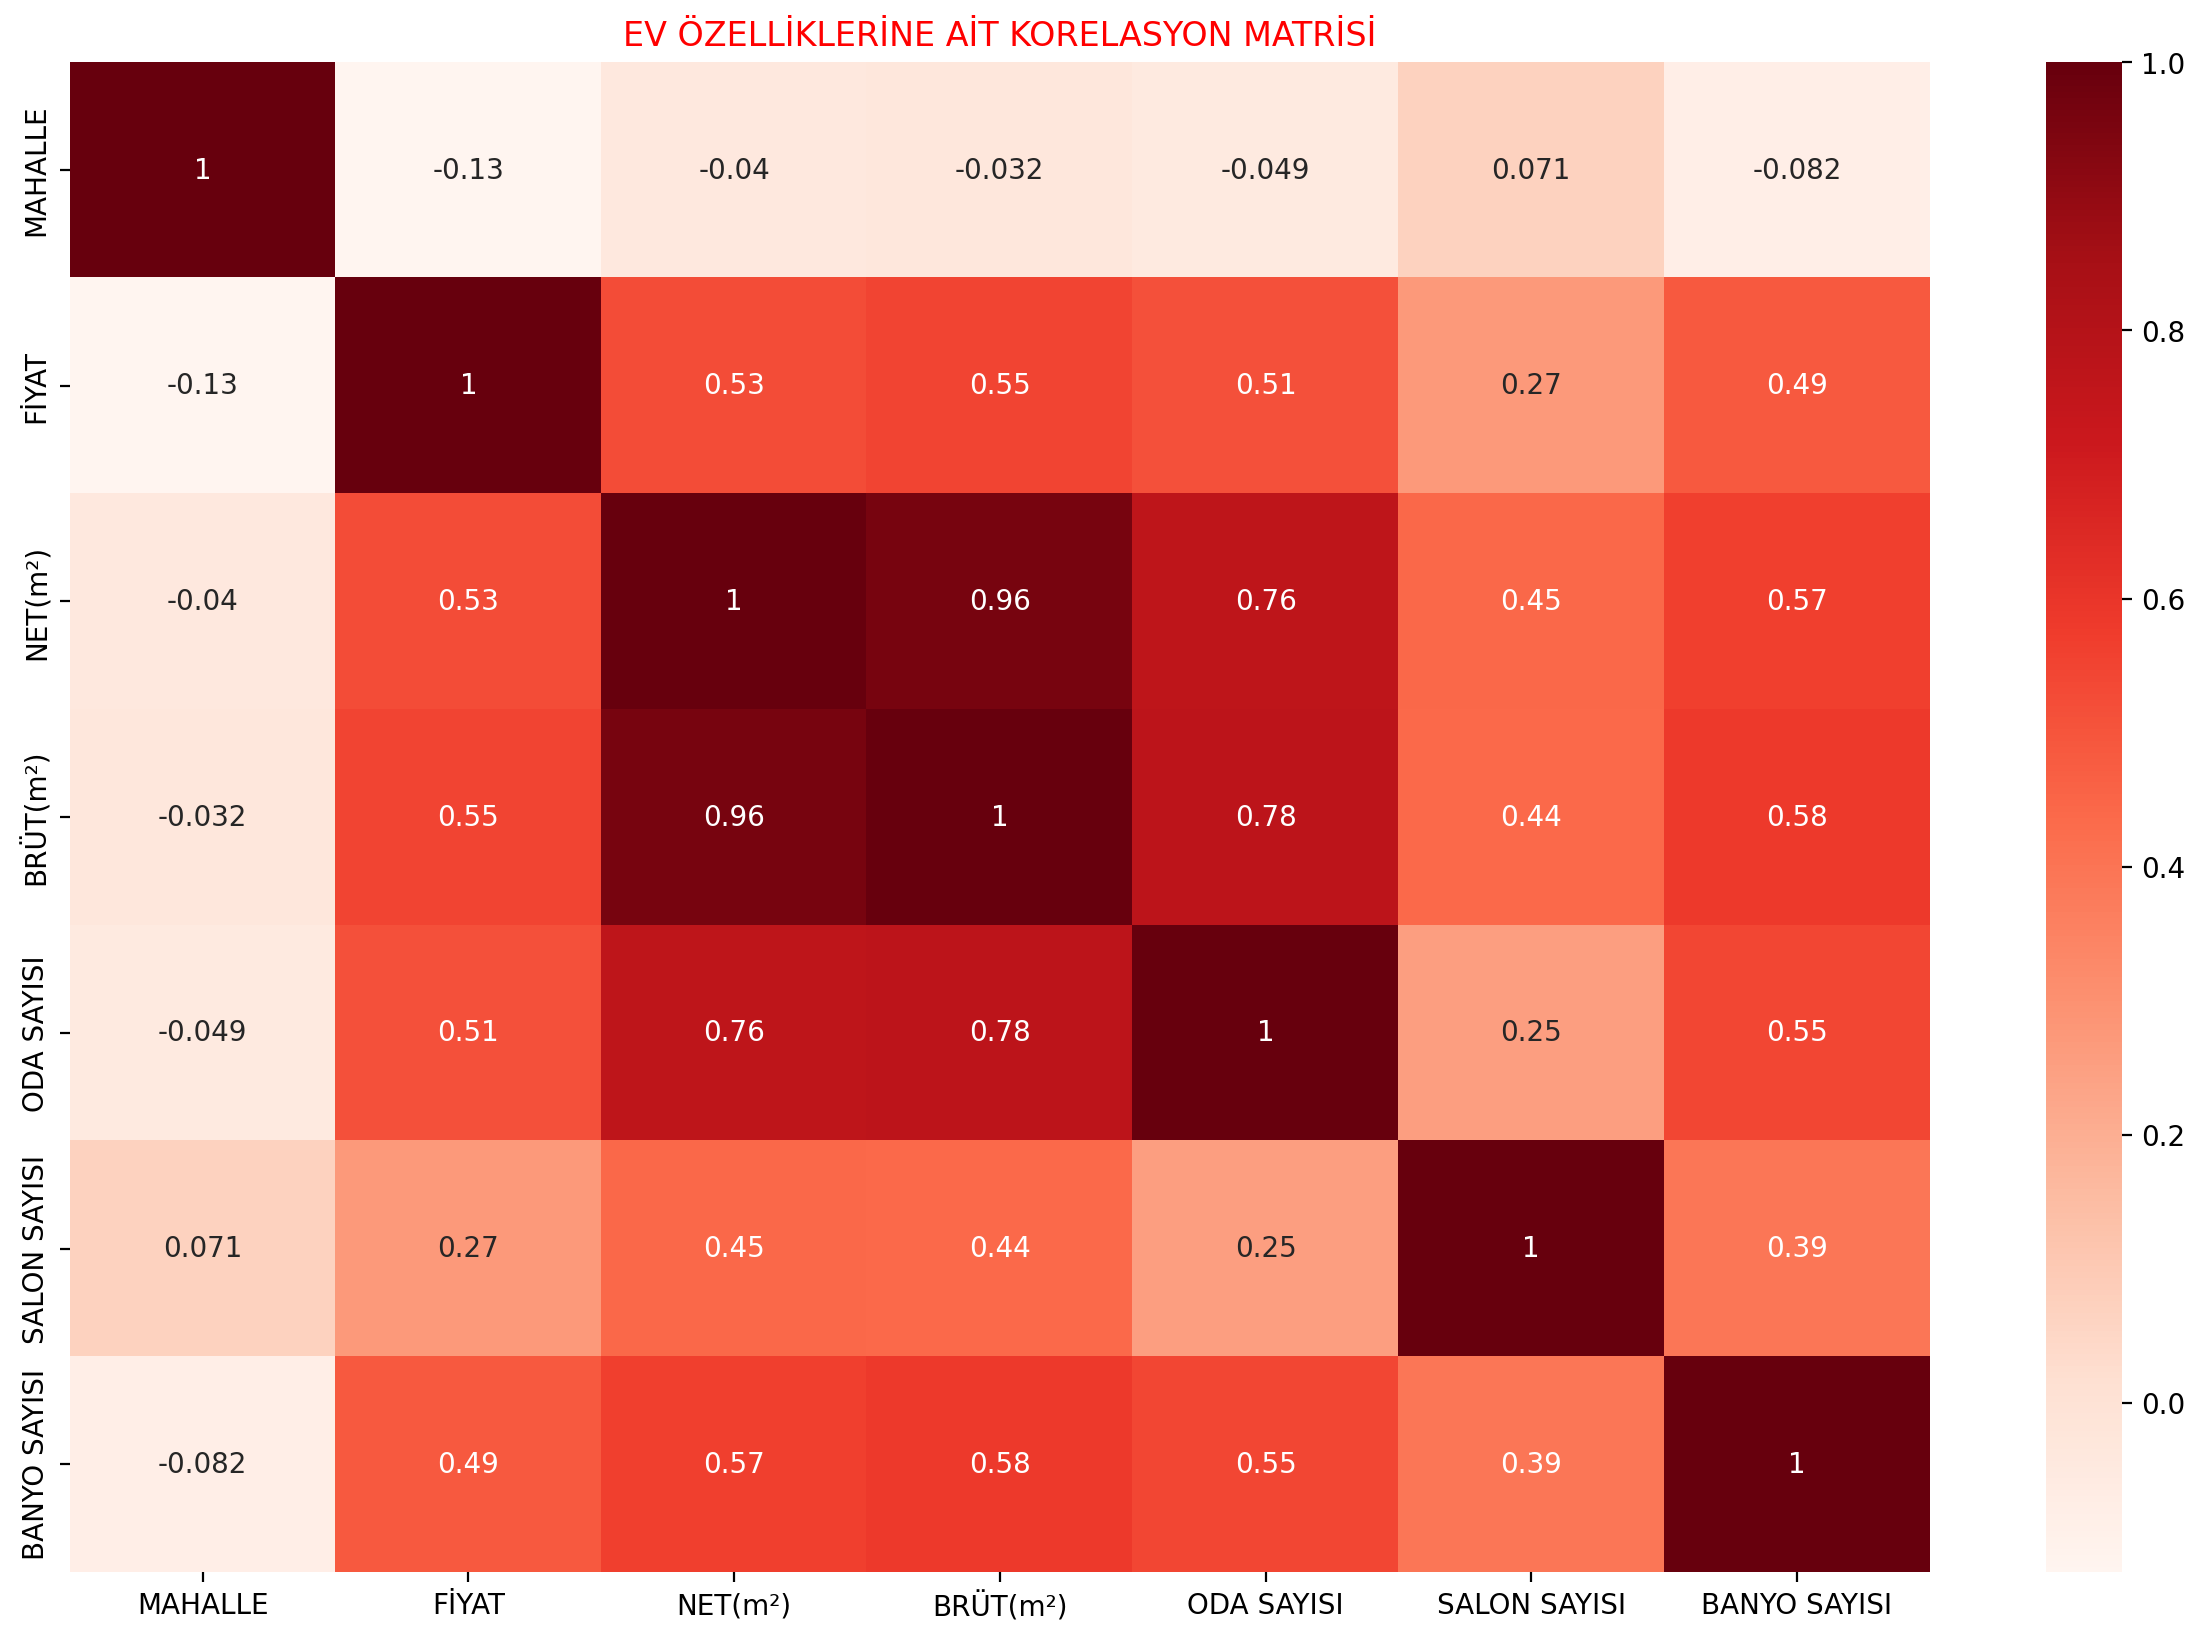

In [46]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("EV ÖZELLİKLERİNE AİT KORELASYON MATRİSİ", c="red")
sns.heatmap(DF.corr(), cmap='Reds', annot=True)

In [47]:
df.to_csv(r"ilanlar_duzgun.csv", encoding="utf-8", index=False)

# Machine Learning

In [48]:
X = new_df.iloc[:,1:]
Y = new_df.iloc[:,:1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.25, random_state=20)

lr_model = LinearRegression()

lr_model.fit(x_train, y_train)
pred = lr_model.predict(x_val)

print("MSE Value: ", np.mean((pred - y_val)**2), "\n")

print("R^2 Score Value (Test): ", lr_model.score(x_test, y_test), "\n")

print("R^2 Score Value (Validation): ", lr_model.score(x_val, y_val), "\n")

print("Coefficients:\n", lr_model.coef_)

MSE Value:  FİYAT    2.307259e+12
dtype: float64 

R^2 Score Value (Test):  0.5641460687640718 

R^2 Score Value (Validation):  0.5551380162545039 

Coefficients:
 [[-6.30327770e+03  1.95373971e+04  2.08537637e+05 -1.38941135e+05
   6.10840385e+05 -5.62116021e+04  4.91217966e+05 -1.38341666e+05
   2.83876810e+05 -3.06059034e+05  2.26551311e+06  1.32985319e+06
  -6.28976689e+05  2.62909558e+05 -1.18724965e+06  2.02789186e+06
   8.23708468e+04 -1.13040009e+06  4.03988122e+05 -2.32830644e-10
  -5.52395860e+05 -7.99592778e+05 -1.54135892e+06 -8.03164740e+05
  -5.97435424e+05  7.88698155e+05 -1.95133167e+05]]


C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [49]:
pred[15:20]

array([[4460768.87783817],
       [5991997.99359708],
       [5876061.63330055],
       [1450828.62488281],
       [5227606.96999843]])

In [50]:
y_test[15:20]

,FİYAT
467,4000000
311,5700000
30,4995000
243,1450000
63,4895000


# Linear Regression

In [51]:
x = new_df.loc[:, ["NET(m²)", "BRÜT(m²)", "ODA SAYISI", "SALON SAYISI"]]
y = new_df.iloc[:,:1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=20)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, random_state=20)

lr_model = LinearRegression()

lr_model.fit(X_train, Y_train)
new_pred = lr_model.predict(X_val)

print("MSE Value: ", np.mean((new_pred - Y_val)**2), "\n")

print("R^2 Score Value (Test): ", lr_model.score(X_test, Y_test), "\n")

print("R^2 Score Value (Validation): ", lr_model.score(X_val, Y_val), "\n")

print("Coefficients:\n", lr_model.coef_)

MSE Value:  FİYAT    2.307259e+12
dtype: float64 

R^2 Score Value (Test):  0.5641460687640718 

R^2 Score Value (Validation):  0.5551380162545039 

Coefficients:
 [[-6.30327770e+03  1.95373971e+04  2.08537637e+05 -1.38941135e+05
   6.10840385e+05 -5.62116021e+04  4.91217966e+05 -1.38341666e+05
   2.83876810e+05 -3.06059034e+05  2.26551311e+06  1.32985319e+06
  -6.28976689e+05  2.62909558e+05 -1.18724965e+06  2.02789186e+06
   8.23708468e+04 -1.13040009e+06  4.03988122e+05 -2.32830644e-10
  -5.52395860e+05 -7.99592778e+05 -1.54135892e+06 -8.03164740e+05
  -5.97435424e+05  7.88698155e+05 -1.95133167e+05]]


C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [52]:
new_pred[15:20]

array([[4460768.87783817],
       [5991997.99359708],
       [5876061.63330055],
       [1450828.62488281],
       [5227606.96999843]])

In [53]:
Y_test[15:20]

,FİYAT
467,4000000
311,5700000
30,4995000
243,1450000
63,4895000


# Ridge Regression

In [54]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train.values)
x_test_scaled = scaler.fit_transform(x_test.values)
x_val_scaled = scaler.fit_transform(x_val.values)

lr_model_ridge = Ridge(alpha=0.05, normalize=True)

lr_model_ridge.fit(x_train_scaled, y_train)

ridge_pred = lr_model_ridge.predict(x_val_scaled)

print("R^2 Score Value (Test): ", lr_model_ridge.score(x_test_scaled, y_test), "\n")

print("R^2 Score Value (Validation): ", lr_model_ridge.score(x_val_scaled, y_val), "\n")

R^2 Score Value (Test):  0.5428583871892624 

R^2 Score Value (Validation):  0.5435514854990946 



In [55]:
ridge_pred[15:20]

array([[4352398.90022115],
       [5982891.63533228],
       [5608164.54257464],
       [1722807.42940569],
       [5196723.55466845]])

In [56]:
y_test[15:20]

,FİYAT
467,4000000
311,5700000
30,4995000
243,1450000
63,4895000


# Lasso Regression

In [57]:
lr_model_lasso = Lasso(alpha=0.05, normalize=True)

lr_model_lasso.fit(x_train_scaled, y_train)

lasso_pred = lr_model_lasso.predict(x_val_scaled)

print("R^2 Score Value (Test): ", lr_model_lasso.score(x_test_scaled, y_test), "\n")

print("R^2 Score Value (Validation): ", lr_model_lasso.score(x_val_scaled, y_val), "\n")

R^2 Score Value (Test):  0.5471671728076855 

R^2 Score Value (Validation):  0.5447857442230302 



C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64531118341399.875, tolerance: 151478538271.60495
  model = cd_fast.enet_coordinate_descent(


In [58]:
lasso_pred[15:20]

array([4445151.57725236, 6059619.12186853, 5779634.46337039,
       1545236.37435251, 5221598.22741531])

In [59]:
y_test[15:20]

,FİYAT
467,4000000
311,5700000
30,4995000
243,1450000
63,4895000
